<a href="https://colab.research.google.com/github/edupiorini/alura-data-science/blob/master/Aula0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando notas em geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
notas = pd.read_csv ('/home/eduardopiorini/Documentos/Alura/data-science/alura-data-science/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
notas.shape
#mostra o formato dos dados como (index, colunas)

(100836, 4)

In [23]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
#altera os labels das colunas para os definidos
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Para mais informações buscar por Pandas Dataframe e Panda Series


In [25]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Mas quantas vezes a nota 4.0 aparece? (contador de valores)

In [26]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [27]:
notas['nota'].mean()
#obtendo a média dos valores

3.501556983616962

# Aula 01

In [28]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

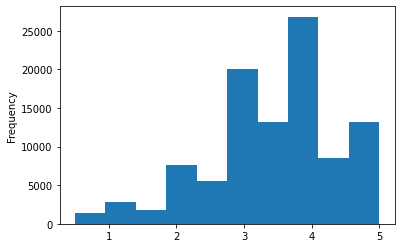

In [29]:
notas.nota.plot(kind ='hist')

In [30]:
print(notas.nota.mean())
print(notas.nota.median())


3.501556983616962
3.5


In [31]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

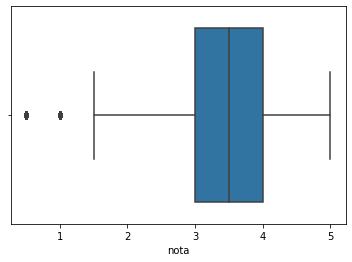

In [32]:
#vamos utilizar o seaborn para melhorar os gráficos
import seaborn as sns

sns.boxplot(notas.nota)


# Exercício aula 1

Letícia é uma estudante de Data Science pela Alura. Um dia, para consolidar o seu conhecimento sobre o que foi estudado, ela decidiu fazer a análise de um arquivo CSV que contém dados sobre filmes lançados recentemente. Um desses dados era uma avaliação dos filmes feita pelos usuários, com notas de zero a dez. Letícia gostaria de analisar quantas vezes cada uma das notas apareceu no CSV, considerando o total de avaliações feitas pelo usuário.

Como ela pode fazer essa contabilidade?


* A maneira mais fácil de realizar essa contagem é utilizar este método(value_counts()) do pandas. Com ele, conseguimos contar a ocorrência dos valores de um maneira mais simples.*

#Exercício 2  Faça o que eu fiz na aula
vide descrição na aula

print(notas.nota.unique())
notas.nota.value_counts()

print(notas.nota.mean())

notas.nota.median()



# Olhando filmes

In [33]:
filmes = pd.read_csv("/home/eduardopiorini/Documentos/Alura/data-science/alura-data-science/movies.csv")
filmes.columns = ['filmeId', ' titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
notas.query("filmeId == 1").nota #query -> pergunta para os dados

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

# Analisando notas especificas por filme

In [35]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [36]:
#Agrupando dados da coluna filmeId
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

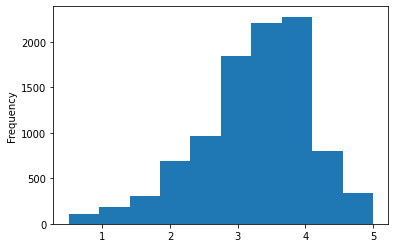

In [37]:
medias_por_filme.plot(kind = 'hist')

<AxesSubplot:ylabel='nota'>

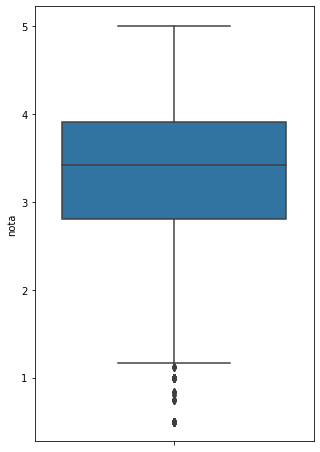

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #forçando o gráfico para ficar em um determinado tamanho
sns.boxplot(y=medias_por_filme)


In [39]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

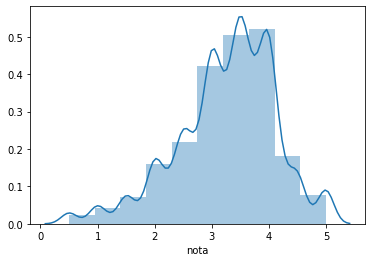

In [40]:
sns.distplot(medias_por_filme, bins=10) # bins seleciona a precisão(divisão) do gráfico

<AxesSubplot:xlabel='nota'>

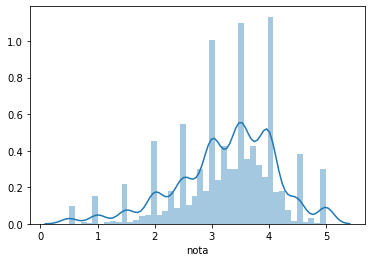

In [41]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

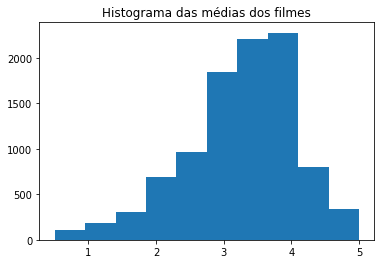

In [42]:
#Essa biblioteca está por tras dos plots do pandas e do seaborn
#pode ser considerada como a biblioteca de nivel mais baixo
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Como podemos obter a média de cada um dos filmeID (filmes) sem ter que digitar o comando milhares de vezes?

In [43]:
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [3]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [45]:
tmdb.original_language.unique()


array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

retorna um conjunto categórico nominal (não ordinal).

## Como visualizar cada nota única?


In [46]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [47]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ta       2
cs       2
ar       2
id       2
ro       2
hu       1
sl       1
nb       1
ps       1
is       1
af       1
no       1
pl       1
ky       1
el       1
vi       1
tr       1
xx       1
te       1
Name: original_language, dtype: int64

In [48]:
tmdb['original_language'].value_counts().index


Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ta', 'cs', 'ar', 'id', 'ro', 'hu',
       'sl', 'nb', 'ps', 'is', 'af', 'no', 'pl', 'ky', 'el', 'vi', 'tr', 'xx',
       'te'],
      dtype='object')

In [49]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [50]:
tmdb['original_language'].value_counts().to_frame().reset_index()
#cria um data Frame



,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [51]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
#cria um data Frame

contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


# Como podemos catagorizar esses dados?

<AxesSubplot:xlabel='original_language', ylabel='total'>

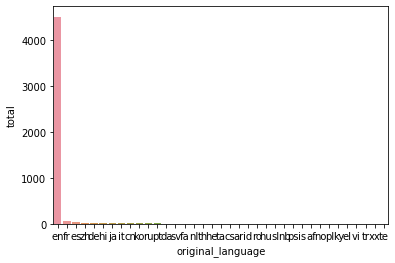

In [52]:
sns.barplot(x ='original_language', y= 'total', data = contagem_de_lingua)
#plot de mais baixo nivel, pois antes plotar é necessário efetuar uma série de ajustes nos dados

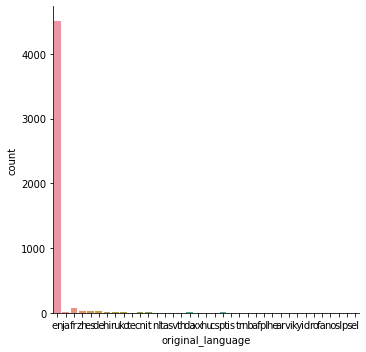

In [53]:
sns.catplot(x = 'original_language',kind = 'count' ,data = tmdb)
#essa seria a opção mais simples e sofisticada, porem nao está ordenado

### O gráfico acima não é ideal, pois não mostra a informção de forma suscinta

([<matplotlib.patches.Wedge at 0x7fbe17139eb0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

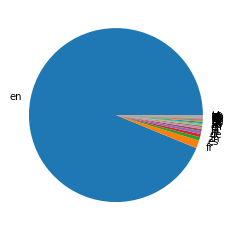

In [54]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

### Ficou pior ainda xP
#### Para visualizarmos melhor, vamos então comparar os filmes em inglês com as demais línguas

In [55]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_ingles

print(total_ingles, total_do_resto)

4505 298


Vamos criar um data frame para imprimir esses dados

In [56]:
dados = { 
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [57]:
#Pegaremos os valores do dicionario acima e transformaremos em um data frame
pd.DataFrame(dados)


,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:>

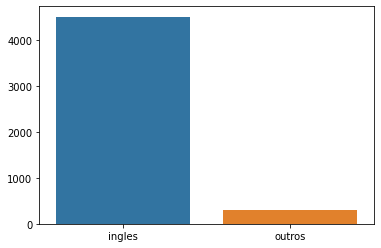

In [58]:
sns.barplot(x = 'lingua', y='total', data= dados)

([<matplotlib.patches.Wedge at 0x7fbdfca18be0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

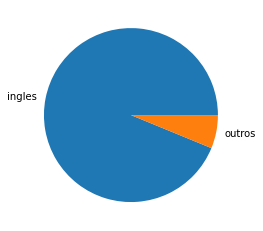

In [62]:
plt.pie(dados["total"], labels = dados["lingua"])

In [5]:
total_por_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_outros

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ta     2
ro     2
ar     2
id     2
cs     2
is     1
nb     1
el     1
te     1
xx     1
pl     1
sl     1
vi     1
ps     1
af     1
ky     1
hu     1
tr     1
no     1
Name: original_language, dtype: int64

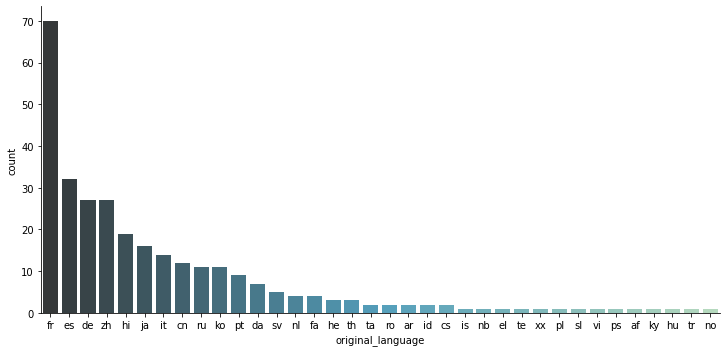

In [10]:
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", 
            kind="count", 
            data=filmes_sem_lingua_original_ingles, 
            aspect=2, order=total_por_lingua_outros.index, 
            palette="GnBu_d")